# Clusteranalyse

In [1]:
# import statements
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
# create blobs
data = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=1.6, random_state=50)
# create np array for data points
points = data[0] 
points

array([[-1.06705283e+00,  9.24306355e+00],
       [ 1.08654318e+00, -6.94815805e+00],
       [-2.30970265e+00,  5.84969440e+00],
       [-1.59728965e+00,  8.45369045e+00],
       [-5.79816711e+00, -3.78405528e+00],
       [-2.29833776e+00, -4.66005371e+00],
       [-1.68210799e+00,  1.12843423e+01],
       [-7.38296450e-01, -5.20135260e+00],
       [-1.92048345e-01, -6.45318764e+00],
       [-6.37920287e+00, -2.17672355e+00],
       [-5.12054803e+00, -2.91449176e+00],
       [-4.22297649e+00,  9.04719945e+00],
       [-2.67815731e+00, -2.32828819e+00],
       [-3.02994109e+00,  1.86959382e+00],
       [-5.73938121e+00, -7.25648845e-01],
       [-1.99427571e+00,  4.28616868e+00],
       [-2.89522086e+00,  1.10222354e+01],
       [-1.11286937e+00,  1.03086380e+01],
       [-5.19987051e+00, -1.59879364e+00],
       [-4.75916597e+00, -1.97047767e+00],
       [-6.76865308e+00, -3.56907573e+00],
       [-2.65715781e+00,  3.33763714e+00],
       [-4.61722463e+00,  1.06373187e+01],
       [-1.

(-15.0, 15.0)

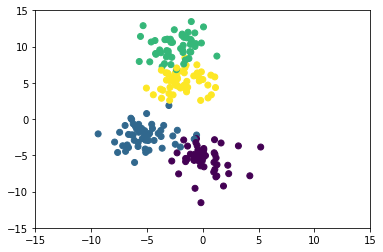

In [17]:
# create scatter plot
plt.scatter(points[:,0], points[:,1], c=data[1], cmap='viridis') #0-Spalte, 1-Spalte, labels,...
plt.xlim(-15,15)
plt.ylim(-15,15)

[[-1.92101646  5.21673484]
 [ 0.05161133 -5.35489826]
 [-5.56465793 -2.34988939]
 [-2.40167949 10.17352695]]


(-15, 15)

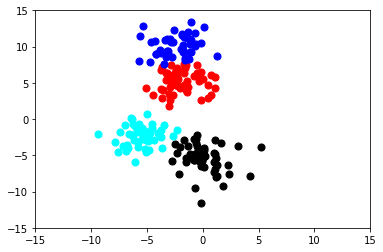

In [3]:
# import KMeans
from sklearn.cluster import KMeans 
# create kmeans object
kmeans = KMeans(n_clusters=4)
# fit kmeans object to data
kmeans.fit(points)
# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(points) 
plt.scatter(points[y_km ==0,0], points[y_km == 0,1], s=50, c='red')
plt.scatter(points[y_km ==1,0], points[y_km == 1,1], s=50, c='black')
plt.scatter(points[y_km ==2,0], points[y_km == 2,1], s=50, c='blue')
plt.scatter(points[y_km ==3,0], points[y_km == 3,1], s=50, c='cyan')
plt.xlim(-15,15)
plt.ylim(-15,15)

# Aufgaben:
## 1. Informieren Sie sich über folgende Clusteralgorithmen: 
### 1.1 AgglomerativeClustering
### 1.2 MeanShift
 Mean Shift ist ein Clustering-Algorithmus, der auf einer Dichtefunktion basiert. Dabei werden die Mittelpunkte der verschiedenen Cluster gesucht. Anfangs werden beliebig viele beliebig große sliding windows gewählt, die jeweils einen bestimmten Radius (kernel) haben. Nun wird in jeder Iteration der Mittelpunkt des sliding windows in die Richtung der höchsten Dichte der Punkte des windows bewegt. So kann es vorkommen, dass mehrere Sliding windows konvergieren. Wird ein Mittelpunkt in der nächsten Iteration nicht mehr verändert, ist der Mittelpunkt der Punkt mit der höchsten Dichte. Das Cluster ist vollständig. Der Algorithmus ist fertig, wenn alle Mittelpunkte gefunden sind und alle Punkte einem Cluser zugeordnet sind. Liegen Punkte am Ende in mehreren Clustern, so werden sie dem größeren Cluster zugeordnet. Die intuitive Vorgehensweise macht diesen Algorithmus gut nachvollziehbar. Ein Nachteil ist die nicht triviale Wahl des Radius (kernel).
### 1.3 DBSCAN
## 2. Informieren Sie sich über die Möglichkeiten, unterschiedliche Cluster-Formen zu generieren
 Scikit-Learn bietet diverse Funktionen, mit deren Hilfe sich Datensätze mit unterschiedlichen Cluster-Formen generieren lassen. Diese eignen sich insbesondere um neue Algorithmen mit bekannten und berechnbaren Datensätze zu testen. 
Möglich sind u.a. folgende Formen: Blobs ("Datenhaufen"), Moons (sichelförmige datasets), Circles (kreisförmige datasets), gaussian quantiles (Normalverteilung).
## 3. Wenden Sie die oben aufgeführten Algorithmen auf unterschiedliche Cluster an


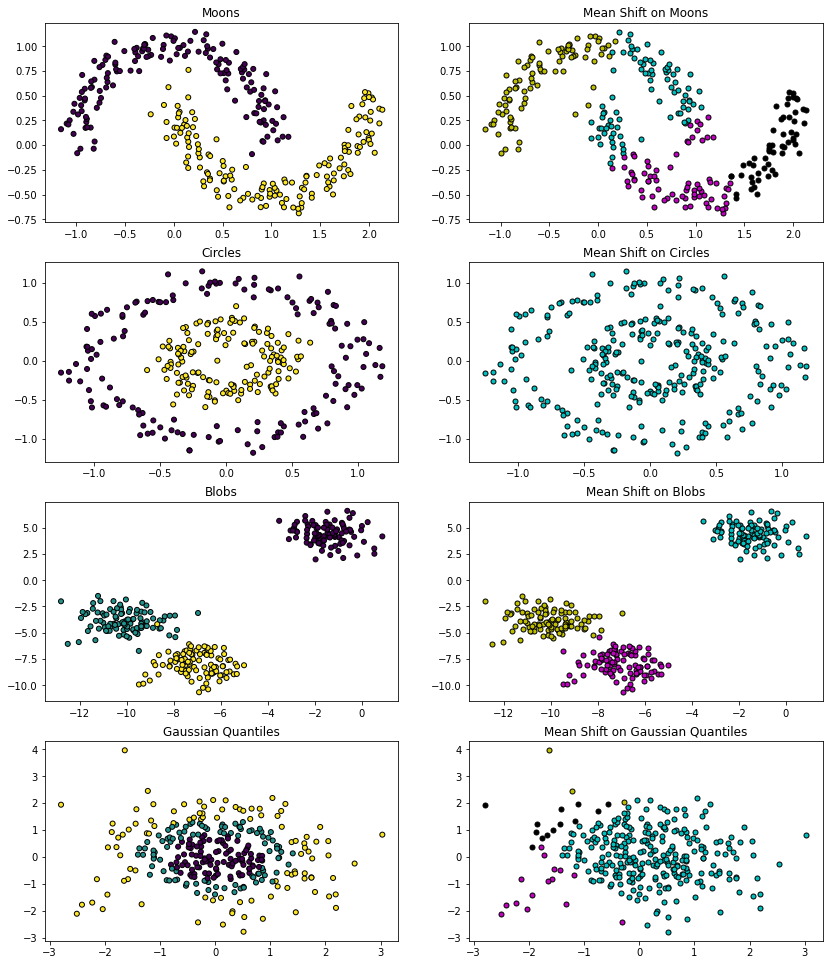

In [159]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_moons
from sklearn.datasets import make_regression

from sklearn.cluster import MeanShift, estimate_bandwidth

plt.figure(figsize=(12, 15))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

n_samples = 300

plt.subplot(421)
plt.title("Moons")
X1, Y1 = make_moons(random_state=1, noise=0.1, n_samples=n_samples)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(422)
plt.title("Meanshift on moons", fontsize='small')
X1, Y1 = make_moons(random_state=1, noise=0.1, n_samples=n_samples)
bandwidth = estimate_bandwidth(X1, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X1)
#apply meanshift
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

colors = cycle('cmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X1[my_members, 0], X1[my_members, 1], col + 'o', markersize=5, markeredgecolor='k' )
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
     #        markeredgecolor='k', markersize=14)
plt.title('Mean Shift on Moons')

plt.subplot(423)
plt.title("Circles")
X2, Y2 = make_circles(noise=0.1, n_samples=n_samples, random_state=1, factor=0.4)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')

plt.subplot(424)
plt.title("Mean Shift on Circles")
X1, Y1 = make_circles(noise=0.1, n_samples=n_samples, random_state=1, factor=0.4)
bandwidth = estimate_bandwidth(X1, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X1)
#apply meanshift
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

colors = cycle('cmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X1[my_members, 0], X1[my_members, 1], col + 'o', markersize=5, markeredgecolor='k' )
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
     #        markeredgecolor='k', markersize=14)
plt.title('Mean Shift on Circles')

plt.subplot(425)
plt.title("Blobs")
X1, Y1 = make_blobs(n_features=2, centers=3, random_state=1, n_samples=n_samples)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(426)
plt.title("Mean Shift on Blobs")
X, Y = make_blobs(n_features=2, centers=3, random_state=1, n_samples=n_samples)
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
#apply meanshift
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

colors = cycle('cmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + 'o', markersize=5, markeredgecolor='k' )
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
     #        markeredgecolor='k', markersize=14)
plt.title('Mean Shift on Blobs')


plt.subplot(427)
plt.title("Gaussian Quantiles")
X1, Y1 = make_gaussian_quantiles(n_samples=n_samples, n_features=2, random_state=1)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

plt.subplot(428)
plt.title("Mean Shift on Gaussian Quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_samples=n_samples, n_features=2, random_state=1)
bandwidth = estimate_bandwidth(X1, quantile=0.2, n_samples=500)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X1)
#apply meanshift
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

colors = cycle('cmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X1[my_members, 0], X1[my_members, 1], col + 'o', markersize=5, markeredgecolor='k' )
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
     #        markeredgecolor='k', markersize=14)
plt.title('Mean Shift on Gaussian Quantiles')

plt.show()

## 4. Untersuchen Sie die Ergebnisse für unterschiedliche Parameter



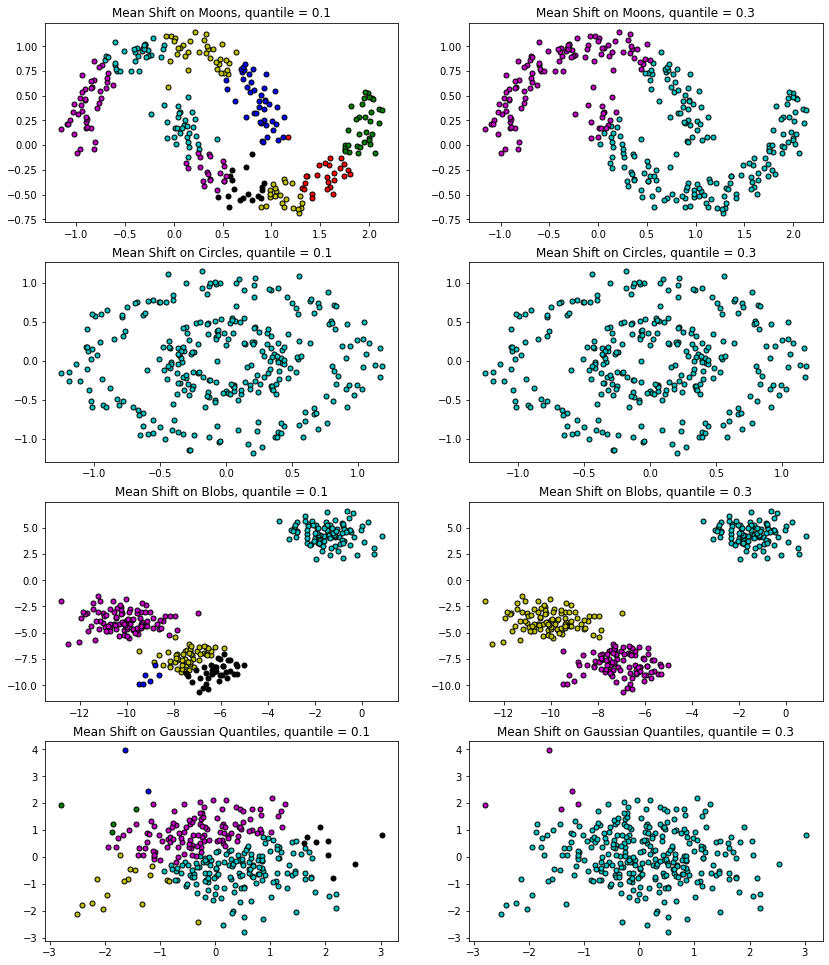

In [163]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_moons
from sklearn.datasets import make_regression

from sklearn.cluster import MeanShift, estimate_bandwidth

plt.figure(figsize=(12, 15))
plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95)

n_samples = 300

#Meanshift on Moons
plt.subplot(421)
plt.title("Meanshift on moons", fontsize='small')
X1, Y1 = make_moons(random_state=1, noise=0.1, n_samples=n_samples)
bandwidth = estimate_bandwidth(X1, quantile=0.1, n_samples=n_samples)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X1)
#apply meanshift
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
#plot cluster
colors = cycle('cmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X1[my_members, 0], X1[my_members, 1], col + 'o', markersize=5, markeredgecolor='k' )
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
     #        markeredgecolor='k', markersize=14)
plt.title('Mean Shift on Moons, quantile = 0.1')

#Meanshift on Moons
plt.subplot(422)
plt.title("Meanshift on moons", fontsize='small')
X1, Y1 = make_moons(random_state=1, noise=0.1, n_samples=n_samples)
bandwidth = estimate_bandwidth(X1, quantile=0.3, n_samples=n_samples)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X1)
#apply meanshift
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
#plot cluster
colors = cycle('cmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X1[my_members, 0], X1[my_members, 1], col + 'o', markersize=5, markeredgecolor='k' )
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
     #        markeredgecolor='k', markersize=14)
plt.title('Mean Shift on Moons, quantile = 0.3')

#Meanshift on Circles
plt.subplot(423)
plt.title("Mean Shift on Circles")
X1, Y1 = make_circles(noise=0.1, n_samples=n_samples, random_state=1, factor=0.4)
bandwidth = estimate_bandwidth(X1, quantile=0.1, n_samples=n_samples)
ms = MeanShift( bin_seeding=True)
ms.fit(X1)
#apply meanshift
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
#plot cluster
colors = cycle('cmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X1[my_members, 0], X1[my_members, 1], col + 'o', markersize=5, markeredgecolor='k' )
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
     #        markeredgecolor='k', markersize=14)
plt.title('Mean Shift on Circles, quantile = 0.1')

#Meanshift on Circles
plt.subplot(424)
plt.title("Mean Shift on Circles")
X1, Y1 = make_circles(noise=0.1, n_samples=n_samples, random_state=1, factor=0.4)
bandwidth = estimate_bandwidth(X1, quantile=0.3, n_samples=n_samples)
ms = MeanShift( bin_seeding=True)
ms.fit(X1)
#apply meanshift
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
#plot cluster
colors = cycle('cmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X1[my_members, 0], X1[my_members, 1], col + 'o', markersize=5, markeredgecolor='k' )
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
     #        markeredgecolor='k', markersize=14)
plt.title('Mean Shift on Circles, quantile = 0.3')

#Meanshift on Blobs
plt.subplot(425)
plt.title("Mean Shift on Blobs")
X, Y = make_blobs(n_features=2, centers=3, random_state=1, n_samples=n_samples)
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=n_samples)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
#apply meanshift
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
#plot cluster
colors = cycle('cmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + 'o', markersize=5, markeredgecolor='k' )
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
     #        markeredgecolor='k', markersize=14)
plt.title('Mean Shift on Blobs, quantile = 0.1')

#Meanshift on Blobs
plt.subplot(426)
plt.title("Mean Shift on Blobs")
X, Y = make_blobs(n_features=2, centers=3, random_state=1, n_samples=n_samples)
bandwidth = estimate_bandwidth(X, quantile=0.3, n_samples=n_samples)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
#apply meanshift
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
#plot cluster
colors = cycle('cmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + 'o', markersize=5, markeredgecolor='k' )
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
     #        markeredgecolor='k', markersize=14)
plt.title('Mean Shift on Blobs, quantile = 0.3')

#Meanshift on Gaussian Quantiles
plt.subplot(427)
plt.title("Mean Shift on Gaussian Quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_samples=n_samples, n_features=2, random_state=1)
bandwidth = estimate_bandwidth(X1, quantile=0.1, n_samples=n_samples)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X1)
#apply meanshift
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
#plot cluster
colors = cycle('cmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X1[my_members, 0], X1[my_members, 1], col + 'o', markersize=5, markeredgecolor='k' )
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
     #        markeredgecolor='k', markersize=14)
plt.title('Mean Shift on Gaussian Quantiles, quantile = 0.1')

#Meanshift on Gaussian Quantiles
plt.subplot(428)
plt.title("Mean Shift on Gaussian Quantiles", fontsize='small')
X1, Y1 = make_gaussian_quantiles(n_samples=n_samples, n_features=2, random_state=1)
bandwidth = estimate_bandwidth(X1, quantile=0.3, n_samples=n_samples)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X1)
#apply meanshift
labels = ms.labels_
cluster_centers = ms.cluster_centers_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
#plot cluster
colors = cycle('cmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X1[my_members, 0], X1[my_members, 1], col + 'o', markersize=5, markeredgecolor='k' )
    #plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
     #        markeredgecolor='k', markersize=14)
plt.title('Mean Shift on Gaussian Quantiles, quantile = 0.3')

plt.show()

## 5. Diskutieren / Beschreiben Sie die Ergebnisse
Der Mean Shift Algorithmus bestimmt Cluster ahnahnd der Nähe der Punkte zueinander. Der Radius, der die Größe des sliding windows bestimmt, wird durch die Bandwith dargestellt. Die Bandwith wird anhand eines gegebenen Quantils berechnet. Je kleiner das Quantil, desto kleiner muss der Abstand zwischen Punkten sein, um einem Cluster zugeordnet zu werden. So kann man z.B. bei der Anwendung von Mean Shift auf ein Moon Cluster sehen, dass mit geringerem Quantil (0.1) mehr Cluster gebildet als mit einem größeren Quantil (0.5). Dieses Verhalten lässt sich bei allen betrachteten datasets erkennen. Insebsondere für datasets, deren Cluster sich in einer bestimmten Form unterscheiden (z.B. circle) und nicht nur durch die Nähe der Punkte, ist dieser Algorithmus also nicht gut geeignet. 
# Einige nützliche Links:

https://towardsdatascience.com/an-introduction-to-clustering-algorithms-in-python-123438574097 

https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68

https://towardsdatascience.com/unsupervised-learning-with-python-173c51dc7f03 

http://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py

https://machinelearningmastery.com/generate-test-datasets-python-scikit-learn/ 

http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html